In [1]:


import matplotlib.pyplot as plt
import pandas as pd
import time

from alphabt import *


# 作多

In [2]:
Data().get(symbol=['AMD']).tail()

open   high    low  close      volume symbol
Date                                                     
2021-05-24  77.26  78.01  76.80  77.44  33194300.0    AMD
2021-05-25  77.33  78.77  76.84  77.86  47353100.0    AMD
2021-05-26  77.83  78.59  77.59  78.34  30354000.0    AMD
2021-05-27  78.11  78.43  77.47  78.42  35883200.0    AMD
2021-05-28  78.66  81.09  78.66  80.08  40928900.0    AMD

In [3]:



class TEMA(Strategy):

    def __init__(self):
        self.data = Data().get(symbol=['AMD'])
        self.init_capital = 100000
        self.tema = self.indicator('TEMA', [8, 13, 21, 34, 55])

    def signal(self, index):

        if (self.tema['8TEMA'][index] > self.tema['13TEMA'][index]) & (self.empty_position):
            self.buy()
        if (self.tema['13TEMA'][index] > self.tema['8TEMA'][index]) & (self.long_position):
            self.sell()

    
    



In [6]:
%%time
log, per = Bt(TEMA).run()

-----------------------------|
sharpe ratio | 0.015 --------|
-----------------------------|
calmar ratio | 0.02 --------|
-----------------------------|
CPU times: user 2.59 s, sys: 13.5 ms, total: 2.61 s
Wall time: 2.61 s


In [22]:
log.head()

BuyDate  BuyPrice  BuyUnits  CashPaying   SellDate  SellPrice  SellUnits  \
0 2000-03-06     23.00      4347    99981.00 2000-03-15      24.50      -4347   
1 2000-03-23     28.28      3766   106502.48 2000-03-27      27.00      -3766   
2 2000-03-31     29.88      3403   101681.64 2000-04-14      34.88      -3403   
3 2000-04-26     42.59      2787   118698.33 2000-05-03      44.75      -2787   
4 2000-05-31     42.94      2904   124697.76 2000-06-13      43.00      -2904   

   CashReceiving  KeepDay  profit(元)  報酬率(%)  累積報酬率(%)  MDD(%)     Equity  \
0      106501.50        9    6520.50   6.522     6.522  17.412  106520.50   
1      101682.00        4   -4820.48  -4.526     1.701   2.492  101700.02   
2      118696.64       14   17015.00  16.734    18.719  13.158  118715.02   
3      124718.25        7    6019.92   5.072    24.741   1.944  124734.94   
4      124872.00       13     174.24   0.140    24.916   6.168  124909.18   

   EquityReturn  EquityAccumulateReturn  
0      6.520500                   6.520  
1     -4.525401                   1.700  
2     16.730577                  18.715  
3      5.070900                  24.735  
4      0.139688                  24.909

In [7]:
per.head()

年度總損益(元)  作多次數(次)  作空次數(次)  交易總次數(次)  勝率(%)  獲利因子  最大損失(元)  最大獲利(元)  \
1999       NaN      NaN      NaN       NaN    NaN   NaN      NaN      NaN   
2000 -39817.75     13.0      0.0      13.0  38.46  0.47 -22043.0  17015.0   
2001  32359.46     15.0      0.0      15.0  66.67  1.76 -17882.0  21445.0   
2002 -37868.64     15.0      0.0      15.0  40.00  0.56 -19180.0  17087.0   
2003  41422.28     16.0      0.0      16.0  50.00  2.46  -6002.0  29110.0   

     個股年度報酬(%)  當年度報酬率(%)  平均交易報酬率(%)  累積年度報酬(%)  當年度權益報酬率(%)  權益累積年度報酬(%)  \
1999       NaN        NaN         NaN        NaN          NaN          NaN   
2000     -7.75     -39.82       -3.06     -39.82       -39.82       -39.82   
2001     12.32      53.77        3.58      -7.46        53.77        -7.46   
2002    -60.32     -40.92       -2.73     -45.33       -40.92       -45.33   
2003    127.13      75.76        4.74      -3.91        75.76        -3.90   

           權益  年化報酬率(%)  權益年化報酬率(%)  大盤年化報酬率(%)  
1999      NaN       NaN         NaN         NaN  
2000  60182.0    -39.82      -39.82       -5.20  
2001  92542.0     -3.80       -3.80       -7.89  
2002  54673.0    -18.23      -18.23      -12.03  
2003  96095.0     -0.99       -0.99       -5.42

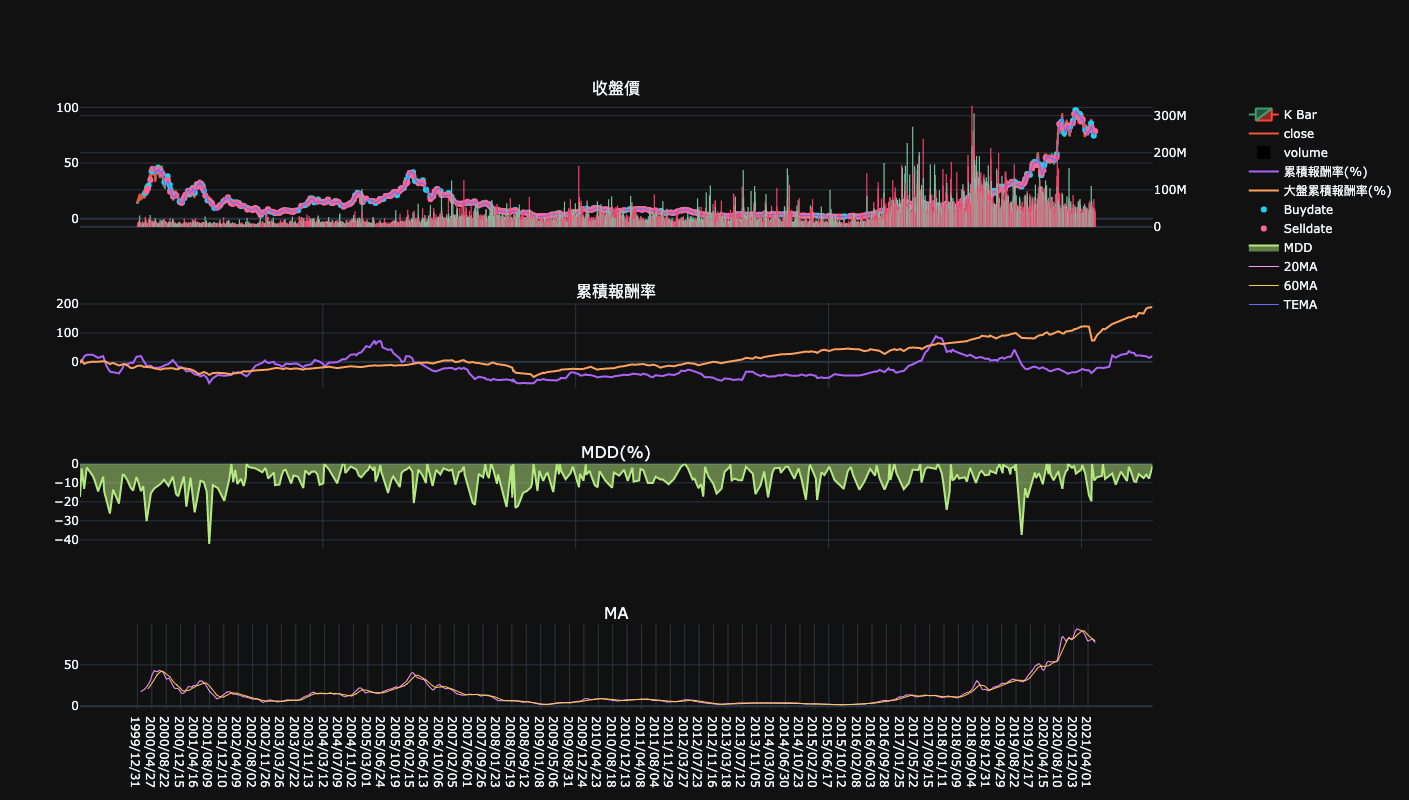

In [8]:
Bt(TEMA).get_plot(subplot_technical_index=['MA'], overlap=['TEMA'], sub_plot_param={'MA':[20, 60]}, overlap_param=None, log=log)
